## Redes Clasificacion

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('always')
from sklearn.model_selection import train_test_split
import shapely.speedups
from sklearn.preprocessing import StandardScaler
from IPython.display import Image
import re
from itertools import combinations
import random

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow import keras
import keras_tuner as kt

from sklearn.metrics import(f1_score,  recall_score, precision_score, accuracy_score, confusion_matrix)

import joblib

np.random.seed(1)
tf.random.set_seed(1)

Para clasificar los datos del dataset tomamos el mismo criterio definir que viviendas son consideradas de precio alto, medio o bajo. 

In [32]:
viviendas_train=pd.read_csv('./TP1/Datasets/viviendas_caba_con_tipo_precio_train.csv').copy()
viviendas_test=pd.read_csv('./TP1/Datasets/viviendas_caba_con_tipo_precio_test.csv').copy()
viviendas = pd.concat([viviendas_train, viviendas_test])

/home/pal/.local/lib/python3.8/site-packages/pandas/core/indexes/base.py:395: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif issubclass(data.dtype.type, np.bool) or is_bool_dtype(data):
/home/pal/.local/lib/python3.8/site-packages/pandas/core/indexes/base.py:395: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif issubclass(data.dtype.type, np.

In [33]:
viviendas

,start_date,end_date,latitud,longitud,barrio,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_title,geometry,pxm2,tipo_precio
0,2021-12-15,2021-12-25,-34.555049,-58.490513,Saavedra,Departamento,2.0,1.0,58.0,49.0,167113.0,Departamento - Saavedra,POINT (-58.4905135 -34.5550487),2881.258621,Alto
1,2021-05-20,2021-06-05,-34.546991,-58.478553,Saavedra,Departamento,2.0,1.0,48.0,44.0,129000.0,Departamento - Saavedra,POINT (-58.4785532 -34.546991),2687.500000,Medio
2,2021-03-20,2021-04-16,-34.570842,-58.491805,Villa Urquiza,Departamento,2.0,1.0,62.0,58.0,124600.0,Venta Depto 2 amb Anticipo + Cuotas CAC V. Urq...,POINT (-58.4918048 -34.5708421),2009.677419,Medio
3,2021-07-17,2021-10-16,-34.589251,-58.402106,Recoleta,Departamento,3.0,2.0,60.0,60.0,196000.0,Excelente 3 ambientes en venta en Barrio Recoleta,POINT (-58.4021058 -34.5892511),3266.666667,Alto
4,2021-07-02,2022-02-09,-34.626290,-58.437632,Caballito,Departamento,3.0,2.0,67.0,61.0,235000.0,VENTA DEPARTAMENTO 3 AMB. EN CABALLITO,POINT (-58.4376325 -34.6262899),3507.462687,Alto
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18571,2021-02-13,2021-03-01,-34.594510,-58.413521,Barrio Norte,Departamento,3.0,2.0,60.0,51.0,148500.0,VENTA DEPARTAMENTO 3 AMBIENTES BALCÓN FRENTE 3...,POINT (-58.413521 -34.59451),2475.000000,Medio
18572,2021-08-20,2200-12-31,-34.540767,-58.466694,Nuñez,Casa,4.0,3.0,210.0,210.0,590000.0,Casa - Nuñez,POINT (-58.4666936 -34.5407667),2809.523810,Alto
18573,2021-09-08,2021-10-14,-34.586723,-58.402579,Recoleta,Departamento,2.0,1.0,35.0,35.0,97000.0,Recoleta 2 amb Oportunidad,POINT (-58.4025792 -34.5867234),2771.428571,Medio
18574,2021-01-12,2021-06-05,-34.579607,-58.489898,Villa Urquiza,Departamento,4.0,3.0,76.0,73.0,245000.0,4 ambientes al contrafrente con balcón y coche...,POINT (-58.4898982 -34.579607),3223.684211,Alto


Hacemos un onehot encoding para poder utilizar columnas no numericas a la hora de entrenar los modelos

In [34]:
viviendas = pd.get_dummies(viviendas, columns = ["property_type"]) 
viviendas = pd.get_dummies(viviendas, columns = ["barrio"])
viviendas = pd.get_dummies(viviendas, columns = ["tipo_precio"])

/home/pal/.local/lib/python3.8/site-packages/pandas/core/indexes/base.py:395: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif issubclass(data.dtype.type, np.bool) or is_bool_dtype(data):
/home/pal/.local/lib/python3.8/site-packages/pandas/core/indexes/base.py:395: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif issubclass(data.dtype.type, np.

In [35]:
viviendas_train, viviendas_test = train_test_split(viviendas, test_size=0.2, random_state=2)

Definimos las columnas que queremos predecir y las que usaremos para predecir

In [36]:
variables_a_predecir = ['tipo_precio_Alto', 'tipo_precio_Bajo', 'tipo_precio_Medio']

In [37]:
columnas_predictoras=viviendas_train.columns.to_list()
variables_a_remover = ['property_price', 'start_date', 'end_date', 'property_title', 'geometry', 'pxm2']
variables_a_remover.extend(variables_a_predecir)
for variable in variables_a_remover:
    columnas_predictoras.remove(variable)
columnas_predictoras

['latitud',
 'longitud',
 'property_rooms',
 'property_bedrooms',
 'property_surface_total',
 'property_surface_covered',
 'property_type_Casa',
 'property_type_Departamento',
 'property_type_PH',
 'barrio_Abasto',
 'barrio_Agronomía',
 'barrio_Almagro',
 'barrio_Balvanera',
 'barrio_Barracas',
 'barrio_Barrio Norte',
 'barrio_Belgrano',
 'barrio_Boca',
 'barrio_Boedo',
 'barrio_Caballito',
 'barrio_Catalinas',
 'barrio_Centro / Microcentro',
 'barrio_Chacarita',
 'barrio_Coghlan',
 'barrio_Colegiales',
 'barrio_Congreso',
 'barrio_Constitución',
 'barrio_Flores',
 'barrio_Floresta',
 'barrio_Las Cañitas',
 'barrio_Liniers',
 'barrio_Mataderos',
 'barrio_Monserrat',
 'barrio_Monte Castro',
 'barrio_Nuñez',
 'barrio_Once',
 'barrio_Palermo',
 'barrio_Parque Avellaneda',
 'barrio_Parque Centenario',
 'barrio_Parque Chacabuco',
 'barrio_Parque Chas',
 'barrio_Parque Patricios',
 'barrio_Paternal',
 'barrio_Pompeya',
 'barrio_Puerto Madero',
 'barrio_Recoleta',
 'barrio_Retiro',
 'barrio_S

Definimos una clase ModeloRedes, con la que vamos a crear las redes. Esto nos permite variar facilmente los distintos hiperparametros

In [38]:
class ModeloRedes:
    def __init__(self, dataset_train, dataset_test, variables_predictoras, cantidad_de_primera_capa, funcion_activacion, optimizador, learning_rate, metrica, epoch, batch_size, modelo=None):
        self.variables_predictoras = variables_predictoras
        self.cantidad_primera_capa = cantidad_de_primera_capa
        self.funcion_activacion = funcion_activacion
        self.optimizador = optimizador
        self.learning_rate = learning_rate
        self.resultado = None
        self.metrica = metrica
        self.epoch = epoch
        self.batch_size = batch_size
        self.modelo = modelo

        
        self.x_test = dataset_test.loc[:,variables_predictoras]
        self.y_test = dataset_test.loc[:,variables_a_predecir]
        self.x_train = dataset_train.loc[:,variables_predictoras]
        self.y_train = dataset_train.loc[:,variables_a_predecir]
        self.x_test_original = None
        self.x_train_original = None
        self.escalar_datasets()
        if modelo == None:
            self.entrenar_modelo()
    
    def escalar_datasets(self):
        sscaler=StandardScaler()
        sscaler.fit(pd.DataFrame(self.x_train))
        
        self.x_train_original = self.x_train
        self.x_test_original = self.x_test
        self.x_train=sscaler.transform(pd.DataFrame(self.x_train))
        self.x_test=sscaler.transform(pd.DataFrame(self.x_test))

    def entrenar_modelo(self):
    # Creo un modelo Red Neuronal
        d_in= len(self.variables_predictoras)
        d_out=3

        capas = [
            # input layer
            keras.layers.Dense(d_in,input_shape=(d_in,), activation= self.funcion_activacion)
        ]

        #inserta capas que van decreciendo en cantidad de neuronas
        for i in range(self.cantidad_primera_capa,4,-1):
            capas.append(keras.layers.Dense(i, activation= self.funcion_activacion ))

        capas.append(keras.layers.Dense(d_out, activation= 'softmax'))
        self.modelo = keras.Sequential(capas)

        self.modelo.compile(
        optimizer= self.optimizador(self.learning_rate), 
        loss='categorical_crossentropy', 
        metrics=[self.metrica], 
        )

        self.modelo.fit(self.x_train,self.y_train,epochs=self.epoch,batch_size=self.batch_size,verbose=False)

    
    #toma las salidas que indican la probabilidad de que cierta vivienda sea de un tipo determinado, y a la mas grande la reemplaza por 1 y a las mas chicas por 0
    def transformar_predicciones(self, y_pred):
        for i in y_pred:
            pos_maximo = 0
            for j in range(len(i)):
                if i[j] > i[pos_maximo]:
                    pos_maximo = j
            for j in range(len(i)):
                if j == pos_maximo:
                    i[j] = 1
                else:
                    i[j]= 0
        return y_pred

    def testear_modelo(self):
        y_pred=self.modelo.predict(self.x_test)

        y_pred = self.transformar_predicciones(y_pred)

        self.resultado = f1_score(self.y_test.values.tolist(),y_pred, average='weighted')

        return self.resultado
    
    def matriz_confusion(self):
        y_pred=self.modelo.predict(self.x_test)
        y_pred = self.transformar_predicciones(y_pred)
        matriz = confusion_matrix(self.y_test.values.argmax(axis=1), y_pred.argmax(axis=1))
        labels = {"alto": 0, "bajo": 1,"medio": 2}
     
        plt.figure(figsize = (16, 9))
        sns.heatmap(matriz, annot = True,cmap = 'coolwarm', fmt="g", xticklabels=labels, yticklabels=labels)
        
        plt.title("Matriz de confusión")
        plt.xlabel("Predicted")
        plt.ylabel("True")
        plt.show()
  
        accuracy = accuracy_score(self.y_test.values.tolist(), y_pred)
        recall = recall_score(self.y_test.values.tolist(), y_pred, average="weighted")
        presicion = precision_score(self.y_test.values.tolist(), y_pred, average="weighted")
        f1 = f1_score(self.y_test.values.tolist(),y_pred, average='weighted')
        print()
        print("accuracy:",accuracy)
        print("recall", recall)
        print("presicion", presicion)
        print('f1',f1)
    
    
    def info(self):
        print('\n\n Variables predictoras utilizadas: ',self.variables_predictoras , 
        '\n Cantidad de nueronas de la primera capa: ',self.cantidad_primera_capa ,
        '\n Funcion de activacion: ',self.funcion_activacion ,
        '\n Optimizador: ',self.optimizador ,
        '\n Learning Rate: ',self.learning_rate 
        ,'\n Metrica: ',self.metrica ,
        '\n Epoch: ',self.epoch ,
        '\n Batch size',self.batch_size
        )
        self.matriz_confusion()


#### Randomizador

Ultilizamos un random_validator para realizar la busqueda de hiperparametros. Como el dataset es muy grande primero buscamos los hiperparametros sobre porciones del mismo, 3000 datos. Una vez encontremos algunos conjuntos de hiperparametros que den buenas metricas, pasaremos a utilizar esos hiperparametros para entrenar un modelo con todos los datos. Para reducir un poco la complejidad tomamos que siempre las neuronas siempre se colocan de manera piramidal, es decir que si la primera layer tiene 18 neuronas, la siguiente tendra 17, luego 16 y asi hasta llegar a 4

Lo que variamos es la funcion de activacion, el optimizador, la learning rate, la metrica con la que optimiza, cantidad de nueronas,epoch y batch size. Tambien variamos que columnas se ultilizan para predecir.

In [39]:
def random_validator(cantidad_modelos, posibles_funcion_activacion, posibles_optimizador, 
    posibles_learning_rate, posibles_metricas, obtener_posibles_variables_predictoras):
    
    resultados = []
    for i in range(cantidad_modelos):

        variables_predictoras = obtener_posibles_variables_predictoras()
        cantidad_de_primera_capa = random.randrange(4, 20, 1)
        funcion_activacion = random.choice(posibles_funcion_activacion)
        optimizador = random.choice(posibles_optimizador)
        learning_rate = random.choice(posibles_learning_rate)
        metrica = random.choice(posibles_metricas)
        epoch = random.randrange(100, 300, 10)
        batch_size = random.randrange(10, 1000, 1)
        df_reducido = viviendas_train[:3000]
        df_train, df_test = train_test_split(df_reducido.loc[:],test_size=0.2)

        modelo = ModeloRedes(df_train, df_test, variables_predictoras, cantidad_de_primera_capa, funcion_activacion, optimizador, learning_rate, metrica, epoch, batch_size)
        resultados.append([modelo, modelo.testear_modelo()])
        modelo.info
        print(modelo.testear_modelo())
    return resultados

Definimos a continuacion los posibles valores que pueden tomar los distintos parametros a la hora de hacer un modelo random. Las columnas en particular las dividimos en dos categorias, aquellas importantes que representan una importante variabibilidad de los datos, y aquellas que serian mas bien columnas extras. De esta manera siempre nos aseguramos que hayan al menos 1 columna importante ya que de lo contrario el resultado siempre resulta malo

In [40]:
columnas_importantes =  ['latitud', 'longitud', 'property_surface_total', 'property_surface_covered']
columnas_extras = []
for e in columnas_predictoras:
    if e not in columnas_importantes:
        columnas_extras.append(e)       

def agregar_columnas(posibles_variables_predictoras, columnas, cant_columnas):
            i = 0
            while (i < cant_columnas): 
                pos = random.randrange(i,len(columnas), 1)
                posibles_variables_predictoras.append(columnas[pos])
                columnas[i], columnas[pos] = columnas[pos], columnas[i]
                i += 1

                                        #vimos que los modelos buenos utilizaban "relu" asique dejamos de utilizar el resto dentro de random search
posibles_funcion_activacion = ['softmax',"relu","tanh", "sigmoid"]
posibles_metricas = ['AUC', 'accuracy', 'Precision', 'Recall']

posibles_learning_rate = [0.1, 0.01, 0.001]

In [41]:
def funcion_optimizadoraNADAM(learnigRate):
            return keras.optimizers.Nadam(learning_rate = learnigRate)

def funcion_optimizadoraRMSPROP(learnigRate):
            return keras.optimizers.RMSprop(learning_rate = learnigRate)

def funcion_optimizadoraADAMAX(learnigRate):
            return keras.optimizers.Adamax(learning_rate = learnigRate)

def funcion_optimizadoraADADELTA(learnigRate):
            return keras.optimizers.Adadelta(learning_rate = learnigRate)

def funcion_optimizadoraSGD(learnigRate):
            return keras.optimizers.SGD(learning_rate = learnigRate)

posibles_optimizador = [funcion_optimizadoraNADAM, funcion_optimizadoraRMSPROP, funcion_optimizadoraADAMAX, funcion_optimizadoraADADELTA, funcion_optimizadoraSGD]

In [42]:
def obtener_posibles_variables_predictoras():
        posibles_variables_predictoras = []     
        cant_columnas_importantes = random.randrange(1,len(columnas_importantes)+1, 1)
        cant_columnas_extras = random.randrange(0,len(columnas_extras)+1, 1)

        agregar_columnas(posibles_variables_predictoras, columnas_importantes, cant_columnas_importantes)
        agregar_columnas(posibles_variables_predictoras, columnas_extras, cant_columnas_extras)
        return posibles_variables_predictoras

### Entrenamiento de redes

#### Obtener hiperparametros

In [43]:
#Hace 50 modelos con hiperparametros random sobre datasets de 3000 elementos
def obtener_50_modelos():
    resultados = random_validator(50, posibles_funcion_activacion, posibles_optimizador, posibles_learning_rate, posibles_metricas,obtener_posibles_variables_predictoras)

    return resultados

In [44]:
#dado un conjunto de modelos se queda con los modelos cuyo f1-score sea mayor a 0.55
def obtener_mejores(resultados):
    mejores = []
    for i in resultados:
        if (i[1] > 0.55 ):
            mejores.append(i)

    return mejores

In [45]:
mejores = []

Entrenamos 250 modelos random para obtener los hiperparametros

In [46]:
"""for i in range(5):
    resultados = obtener_50_modelos()
    mejores.append(obtener_mejores(resultados))"""

'for i in range(5):\n    resultados = obtener_50_modelos()\n    mejores.append(obtener_mejores(resultados))'

Como esto toma mucho tiempo solo mostramos el entrenamiento de 10 modelos. Puede pasar que ninguno de los 5 modelos supere el limite de 0.55 en cuyo caso no habria obtenido ningun conjunto de hiperparametros.

In [47]:
def obtener_10_modelos():
    resultados = random_validator(10, posibles_funcion_activacion, posibles_optimizador, posibles_learning_rate, posibles_metricas,obtener_posibles_variables_predictoras)

    return resultados

In [48]:
resultados = obtener_10_modelos()
mejores.append(obtener_mejores(resultados))

/home/pal/.local/lib/python3.8/site-packages/pandas/core/indexes/base.py:395: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif issubclass(data.dtype.type, np.bool) or is_bool_dtype(data):
/home/pal/.local/lib/python3.8/site-packages/pandas/core/indexes/base.py:395: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif issubclass(data.dtype.type, np.

19/19 [==============================] - 0s 2ms/step
0.347648906735389


/home/pal/.local/lib/python3.8/site-packages/pandas/core/indexes/base.py:395: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif issubclass(data.dtype.type, np.bool) or is_bool_dtype(data):
/home/pal/.local/lib/python3.8/site-packages/pandas/core/indexes/base.py:395: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif issubclass(data.dtype.type, np.

19/19 [==============================] - 0s 2ms/step
0.549516252206696


/home/pal/.local/lib/python3.8/site-packages/pandas/core/indexes/base.py:395: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif issubclass(data.dtype.type, np.bool) or is_bool_dtype(data):
/home/pal/.local/lib/python3.8/site-packages/pandas/core/indexes/base.py:395: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif issubclass(data.dtype.type, np.

19/19 [==============================] - 0s 2ms/step
0.5024170389475654


/home/pal/.local/lib/python3.8/site-packages/pandas/core/indexes/base.py:395: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif issubclass(data.dtype.type, np.bool) or is_bool_dtype(data):
/home/pal/.local/lib/python3.8/site-packages/pandas/core/indexes/base.py:395: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif issubclass(data.dtype.type, np.

19/19 [==============================] - 0s 2ms/step
0.5499490929977063


/home/pal/.local/lib/python3.8/site-packages/pandas/core/indexes/base.py:395: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif issubclass(data.dtype.type, np.bool) or is_bool_dtype(data):
/home/pal/.local/lib/python3.8/site-packages/pandas/core/indexes/base.py:395: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif issubclass(data.dtype.type, np.

19/19 [==============================] - 0s 2ms/step
0.35201465201465204


/home/pal/.local/lib/python3.8/site-packages/pandas/core/indexes/base.py:395: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif issubclass(data.dtype.type, np.bool) or is_bool_dtype(data):
/home/pal/.local/lib/python3.8/site-packages/pandas/core/indexes/base.py:395: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif issubclass(data.dtype.type, np.

19/19 [==============================] - 0s 2ms/step
0.3660044893378227


/home/pal/.local/lib/python3.8/site-packages/pandas/core/indexes/base.py:395: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif issubclass(data.dtype.type, np.bool) or is_bool_dtype(data):
/home/pal/.local/lib/python3.8/site-packages/pandas/core/indexes/base.py:395: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif issubclass(data.dtype.type, np.

19/19 [==============================] - 0s 2ms/step
0.46317491172546565


/home/pal/.local/lib/python3.8/site-packages/pandas/core/indexes/base.py:395: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif issubclass(data.dtype.type, np.bool) or is_bool_dtype(data):
/home/pal/.local/lib/python3.8/site-packages/pandas/core/indexes/base.py:395: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif issubclass(data.dtype.type, np.

19/19 [==============================] - 0s 2ms/step
0.3059322033898305


/home/pal/.local/lib/python3.8/site-packages/pandas/core/indexes/base.py:395: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif issubclass(data.dtype.type, np.bool) or is_bool_dtype(data):
/home/pal/.local/lib/python3.8/site-packages/pandas/core/indexes/base.py:395: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif issubclass(data.dtype.type, np.

19/19 [==============================] - 0s 2ms/step
0.5228344054209877


/home/pal/.local/lib/python3.8/site-packages/pandas/core/indexes/base.py:395: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif issubclass(data.dtype.type, np.bool) or is_bool_dtype(data):
/home/pal/.local/lib/python3.8/site-packages/pandas/core/indexes/base.py:395: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif issubclass(data.dtype.type, np.

19/19 [==============================] - 0s 4ms/step
0.5438504002096816


In [49]:
mejores

[[]]

#### Entrenamiento sobre todo el dataset

Una vez obtenemos un conjunto de modelos buenos, tomamos sus hiperparametros y los entrenamos sobre el dataset de viviendas_train y testeamos sobre el viviendas_test. Los entrenamos 3 veces ya que dependiendo de la semilla inicial los resultados pueden variar, y de esta manera obtenemos mejores modelos. Esto lleva mucho tiempo por lo que tambien lo comentamos.

In [50]:
def reentrenar_tot(modelo):
    #modelo.info()
    mejor_modelo = ModeloRedes(
        viviendas_train, 
        viviendas_test, 
        modelo.variables_predictoras, 
        modelo.cantidad_primera_capa, 
        modelo.funcion_activacion, 
        modelo.optimizador, 
        modelo.learning_rate, 
        modelo.metrica, 
        modelo.epoch, 
        modelo.batch_size)
        
    mejor_modelo.testear_modelo()
    mejor_resultado = mejor_modelo.resultado 
   

    for i in range(2):
        print('valor a vencer', mejor_resultado)
        modelo_aux = ModeloRedes(
            viviendas_train, 
            viviendas_test, 
            modelo.variables_predictoras, 
            modelo.cantidad_primera_capa, 
            modelo.funcion_activacion, 
            modelo.optimizador, 
            modelo.learning_rate, 
            modelo.metrica, 
            modelo.epoch, 
            modelo.batch_size)

        resultado_aux = modelo_aux.testear_modelo()
        print('reentrenando intento', i+1)
        resultado_aux = modelo_aux.testear_modelo()
        print(resultado_aux)
        mejor_modelo.info()
        
        if resultado_aux < mejor_resultado:
            mejor_resultado = resultado_aux
            mejor_modelo = modelo_aux 
    return [mejor_modelo, mejor_resultado]

In [51]:
tots = []

In [52]:
"""
for i in mejores:
    for j in i:
        tots.append(reentrenar_tot(j[0]))
        print(tots[-1])
"""

'\nfor i in mejores:\n    for j in i:\n        tots.append(reentrenar_tot(j[0]))\n        print(tots[-1])\n'

Nos quedamos con el mejor modelo de los entrenados sobre todo el dataset

In [53]:
"""
mejor_modelo = tots[0]
for i in tots:
    if (i != None):
        if (i[1] > mejor_modelo[1]):
            mejor_modelo = i
            """

'\nmejor_modelo = tots[0]\nfor i in tots:\n    if (i != None):\n        if (i[1] > mejor_modelo[1]):\n            mejor_modelo = i\n            '

In [54]:
#mejor_modelo

Tuvimos algunos problemas al guardar nuestro objeto Modelo_redes, por lo que nos guardamos por una parte el modelo de queras y por otra los hiperparametros

In [55]:
"""
modelo = mejor_modelo[0]
dic = {'variables_predictoras': modelo.variables_predictoras, 'cantidad_primera_capa': modelo.cantidad_primera_capa,
'funcion_activacion': modelo.funcion_activacion, 'optimizador': modelo.optimizador,
'learning_rate': modelo.learning_rate, 'metrica': modelo.metrica,
'epoch': modelo.epoch, 'batch_size': modelo.batch_size,}
"""

"\nmodelo = mejor_modelo[0]\ndic = {'variables_predictoras': modelo.variables_predictoras, 'cantidad_primera_capa': modelo.cantidad_primera_capa,\n'funcion_activacion': modelo.funcion_activacion, 'optimizador': modelo.optimizador,\n'learning_rate': modelo.learning_rate, 'metrica': modelo.metrica,\n'epoch': modelo.epoch, 'batch_size': modelo.batch_size,}\n"

In [56]:
"""joblib.dump(dic, './Models/hyper_clasif_ultima_tanda') 
modelo.modelo.save('./Models/modelo_clasif_ultima_tanda')"""

"joblib.dump(dic, './Models/hyper_clasif_ultima_tanda') \nmodelo.modelo.save('./Models/modelo_clasif_ultima_tanda')"

EL mejor modelo obtenido tras realizar lo comentado anteriormente fue:

In [57]:
hyper = joblib.load('./Models/hiper_buscando_el_65k')
new_model = keras.models.load_model('./Models/buscando_el_65k')



modelo_redes = ModeloRedes(viviendas_train, viviendas_test, hyper['variables_predictoras'], hyper['cantidad_primera_capa'], hyper['funcion_activacion'],
 hyper['optimizador'], hyper['learning_rate'], hyper['metrica'],  hyper['epoch'], hyper['batch_size'], new_model)

/home/pal/.local/lib/python3.8/site-packages/pandas/core/indexes/base.py:395: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif issubclass(data.dtype.type, np.bool) or is_bool_dtype(data):
/home/pal/.local/lib/python3.8/site-packages/pandas/core/indexes/base.py:395: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif issubclass(data.dtype.type, np.



 Variables predictoras utilizadas:  ['property_surface_total', 'longitud', 'latitud', 'property_surface_covered', 'barrio_Catalinas', 'barrio_Villa del Parque', 'barrio_Parque Chas', 'barrio_Chacarita', 'barrio_Paternal', 'barrio_Agronomía', 'barrio_Pompeya', 'barrio_Villa Riachuelo', 'barrio_Boca', 'barrio_Liniers', 'barrio_Villa Crespo', 'barrio_Puerto Madero', 'barrio_Villa Urquiza', 'barrio_Parque Patricios', 'barrio_Floresta', 'property_type_PH', 'barrio_Abasto', 'barrio_Congreso', 'barrio_Congreso', 'barrio_Velez Sarsfield', 'property_type_Departamento', 'barrio_Flores', 'property_rooms', 'barrio_Constitución', 'barrio_Saavedra', 'barrio_San Nicolás', 'barrio_Almagro', 'barrio_Boedo', 'barrio_Monte Castro', 'barrio_Monserrat', 'barrio_Barrio Norte', 'barrio_Las Cañitas', 'barrio_Caballito', 'barrio_Nuñez', 'barrio_Villa General Mitre', 'barrio_Villa Lugano', 'barrio_Centro / Microcentro', 'barrio_San Cristobal', 'barrio_Versalles', 'barrio_Villa Soldati', 'barrio_Colegiales', '

/home/pal/.local/lib/python3.8/site-packages/pandas/core/indexes/base.py:395: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif issubclass(data.dtype.type, np.bool) or is_bool_dtype(data):


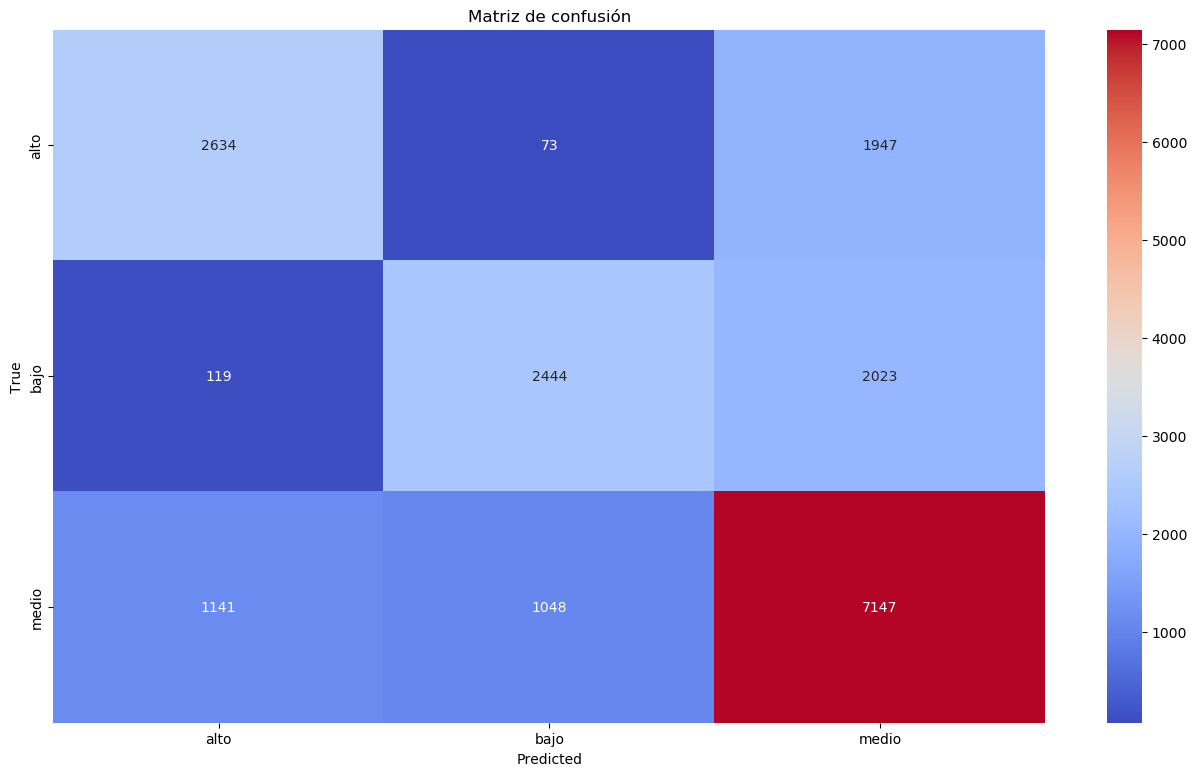


accuracy: 0.6581072351421189
recall 0.6581072351421189
presicion 0.6618242920184162
f1 0.6536919155139114


In [58]:
modelo_redes.info()


### Conclusiones